# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada.
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
# Verificando dados ausentes e duplicados:

df.isna().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# Construindo a função que construirá
# tabela bivariada:

def tabela(dataframe, parametro_explicativo, flag):

  tab = pd.crosstab(dataframe[parametro_explicativo] , df[flag], margins=True)
  tab["prob_doente"] = round(tab[1] / tab['All'],2)
  tab["chance_doença"] = round(tab[1] / tab[0],2)
  tab["taxa_de_doença"] = round((tab['chance_doença'] / tab.loc["All", "chance_doença"]),2)

  return tab

In [7]:
tabela(df, "sex", "flag_doente")

flag_doente,0,1,All,prob_doente,chance_doença,taxa_de_doença
sex,,,,,,
0.0,72,25,97,0.26,0.35,0.41
1.0,92,114,206,0.55,1.24,1.46
All,164,139,303,0.46,0.85,1.00


In [8]:
tabela(df, "cp", "flag_doente").head(10)

flag_doente,0,1,All,prob_doente,chance_doença,taxa_de_doença
cp,,,,,,
1.0,16,7,23,0.30,0.44,0.52
2.0,41,9,50,0.18,0.22,0.26
3.0,68,18,86,0.21,0.26,0.31
4.0,39,105,144,0.73,2.69,3.16
All,164,139,303,0.46,0.85,1.00


In [9]:
tabela(df, "fbs", "flag_doente")

flag_doente,0,1,All,prob_doente,chance_doença,taxa_de_doença
fbs,,,,,,
0.0,141,117,258,0.45,0.83,0.98
1.0,23,22,45,0.49,0.96,1.13
All,164,139,303,0.46,0.85,1.00


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [10]:
def tabela2(dataframe, parametro_explicativo, num_categorias, flag):

  cat_age = (pd.qcut(dataframe[parametro_explicativo], num_categorias, duplicates='drop').
           sort_index())

  agg = dataframe.groupby(cat_age)

  tab2 = (agg[[flag]].count().
          rename(columns = {'flag_doente': 'qt_doente'}))

  return tab2


In [11]:
tabela2(df, "age", 5, "flag_doente")

,qt_doente
age,
"(28.999, 45.0]",63
"(45.0, 53.0]",64
"(53.0, 58.0]",71
"(58.0, 62.0]",45
"(62.0, 77.0]",60


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [12]:
df1 = df.copy()

In [13]:
# Modelo:

reglog = smf.logit(" flag_doente ~ sex + cp + trestbps + age"
                   , data=df1).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.2605
Time:                        18:17:39   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

A partir do valor-p, pode-se considerar que todas as variáveis explicativas apresentam significância estatística.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [14]:
# Calculando a probabilidade do evento predito pelo modelo:

df1["predito"] = round(reglog.predict(df1),2)
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.20
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.93
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.85
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.28
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.02


In [15]:
cat_pred = pd.qcut(df1['predito'], 5, duplicates='drop').sort_index()
group_reg = df1.groupby(cat_pred)
tab3 = (group_reg[['flag_doente']].count().
        rename(columns = {'flag_doente': 'qt_doentes'}))

tab3['predito'] = group_reg['predito'].mean()
tab3['pct_doentes'] = group_reg['flag_doente'].mean()

tab3

,qt_doentes,predito,pct_doentes
predito,,,
"(0.009000000000000001, 0.15]",65,0.080462,0.107692
"(0.15, 0.35]",60,0.262833,0.183333
"(0.35, 0.572]",57,0.465263,0.508772
"(0.572, 0.77]",62,0.675645,0.693548
"(0.77, 0.93]",59,0.840000,0.830508


Text(0.5, 0, 'Grupo')

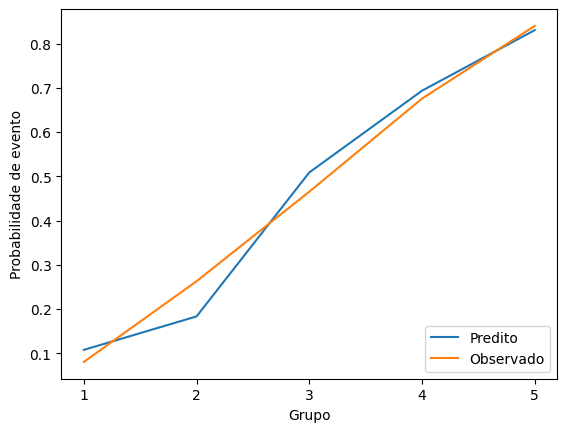

In [16]:
# Visualizando a curva da predição em relação à observada:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = tab3['pct_doentes'].plot(label='Predito')
ax = tab3['predito'].plot(label='Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

Text(0, 0.5, 'Função Distribuição Acumulada')

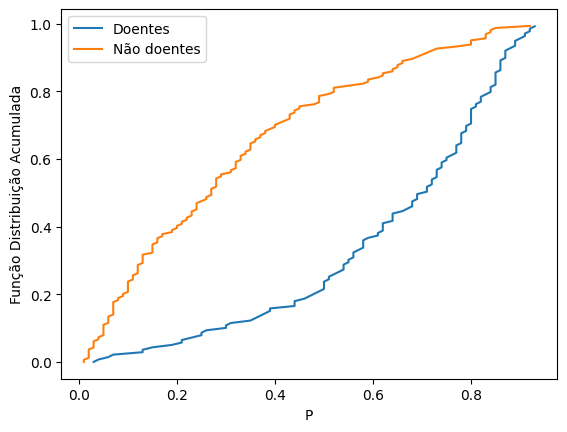

In [17]:
# Criando o gráfico KS:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df1.loc[df1['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1),
                                         endpoint=False), label='Doentes')

score_pop2 = df1.loc[df1['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2),
                                         endpoint=False), label='Não doentes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [18]:
from sklearn import metrics
from scipy.stats import ks_2samp

# Acurácia:
acc = metrics.accuracy_score(df1['flag_doente'], df1['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

# Gini:
fpr, tpr, thresholds = metrics.roc_curve(df1['flag_doente'], df1['predito'])
auc_ = metrics.auc(fpr, tpr)
gini = 2*auc_ -1

# KS:
ks = ks_2samp(df1.loc[df1['flag_doente'] == 1, 'predito'],
              df1.loc[df1['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}%'.format(ks*100))
print('Gini: {0:.2f}%'.format(gini*100))


Acurácia: 77.56%
KS: 57.69%
Gini: 66.13%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

Para tentar melhorar o modelo, busquei verificar o nível de correlação das variáveis explicativas em relação à variável resposta, que é flag_doente, realizando um gráfico que facilita a visualização dessas.

In [19]:
df2 = df.copy()

In [20]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


In [21]:
# Calculando as correlações
correlations = df2.corr()['flag_doente'].drop("flag_doente")
correlations

<ipython-input-21-b8eb2535a38a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df2.corr()['flag_doente'].drop("flag_doente")


age         0.223120
sex         0.276816
cp          0.414446
trestbps    0.150825
chol        0.085164
fbs         0.025264
restecg     0.169202
thalach    -0.417167
exang       0.431894
oldpeak     0.424510
slope       0.339213
num         0.830081
Name: flag_doente, dtype: float64

<ipython-input-22-8dcdb53279e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")


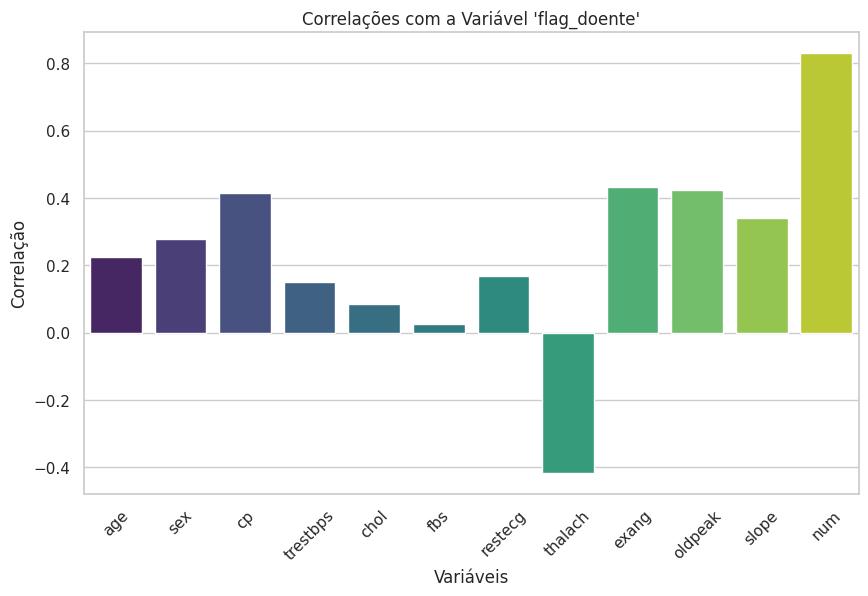

In [22]:
# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando um gráfico de barras das correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.title("Correlações com a Variável 'flag_doente'")
plt.xlabel("Variáveis")
plt.ylabel("Correlação")
plt.xticks(rotation=45)
plt.show()

A partir desse gráfico, nota-se que as variáveis que apresentam mais significância são: num, oldpeak, exang, cp, slope. Vejamos agora o nível de acurácia do modelo com a adição de novas variáveis.

In [23]:
# Segundo Modelo:

reglog = smf.logit(" flag_doente ~ sex + age + cp + exang + slope"
                   , data=df2).fit()

reglog.summary()

Optimization terminated successfully.
         Current function value: 0.459338
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Thu, 18 Jan 2024   Pseudo R-squ.:                  0.3340
Time:                        18:17:41   Log-Likelihood:                -139.18
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.151e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4042      1.345     -6.992      0.000     -12.040      -6.768
sex            1.7196      0.349      4.926      0.000       1.035       2.404
age            0.0598      0.018      3.358      0.001       0.025       0.095
cp             0.8606      0.173      4.965      0.000       0.521       1.200
exang          1.2390      0.341      3.636      0.000       0.571       1.907
slope          0.9950      0.250      3.987      0.000       0.506       1.484
==============================================================================
"""

In [24]:
# Calculando a probabilidade do evento predito pelo modelo:

df2["predito"] = round(reglog.predict(df2),2)

In [25]:
cat_pred = pd.qcut(df2['predito'], 5, duplicates='drop').sort_index()
group_reg = df2.groupby(cat_pred)
tab4 = (group_reg[['flag_doente']].count().
        rename(columns = {'flag_doente': 'qt_doentes'}))

tab4['predito'] = group_reg['predito'].mean()
tab4['pct_doentes'] = group_reg['flag_doente'].mean()

tab4

,qt_doentes,predito,pct_doentes
predito,,,
"(0.009000000000000001, 0.124]",61,0.067869,0.081967
"(0.124, 0.3]",61,0.197705,0.213115
"(0.3, 0.552]",60,0.424833,0.383333
"(0.552, 0.83]",64,0.714375,0.718750
"(0.83, 0.98]",57,0.904737,0.912281


Text(0.5, 0, 'Grupo')

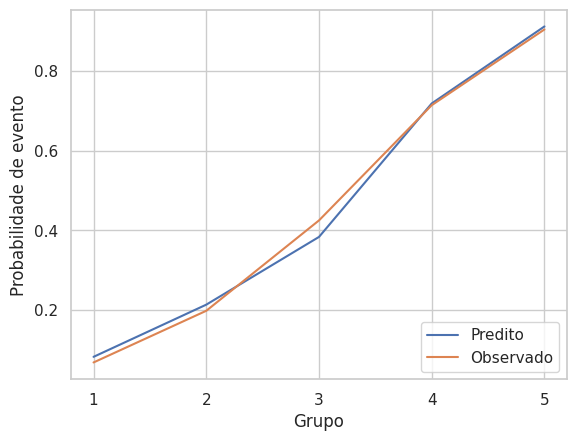

In [26]:
# Visualizando a curva da predição em relação à observada:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = tab4['pct_doentes'].plot(label='Predito')
ax = tab4['predito'].plot(label='Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [27]:
# Acurácia:
acc = metrics.accuracy_score(df2['flag_doente'], df2['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

# Gini:
fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])
auc_ = metrics.auc(fpr, tpr)
gini = 2*auc_ -1

# KS:
ks = ks_2samp(df1.loc[df2['flag_doente'] == 1, 'predito'],
              df1.loc[df2['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}%'.format(ks*100))
print('Gini: {0:.2f}%'.format(gini*100))


Acurácia: 78.55%
KS: 57.69%
Gini: 72.49%


Indicadores encontrados por meio do primeiro modelo:

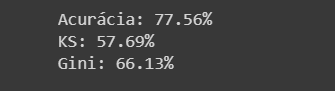

Compreende-se que a partir do segundo modelo os indicadores, em comparação com o primeiro, melhoraram.